# 2. Medical cost Insurance


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/SHIVAM PAL/OneDrive/Documents/medical_cost_insurance.csv")


In [4]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [15]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

we need to target charges so our target variable is float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
print('min_charges:',df['charges'].min())
print('max_charges:',df['charges'].max())

min_charges: 1121.8739
max_charges: 63770.42801


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


there are three categorial features (sex,smoker,region) and rest are numerical features

In [19]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# DATA visualization

# distribution of categorial data

male      676
female    662
Name: sex, dtype: int64


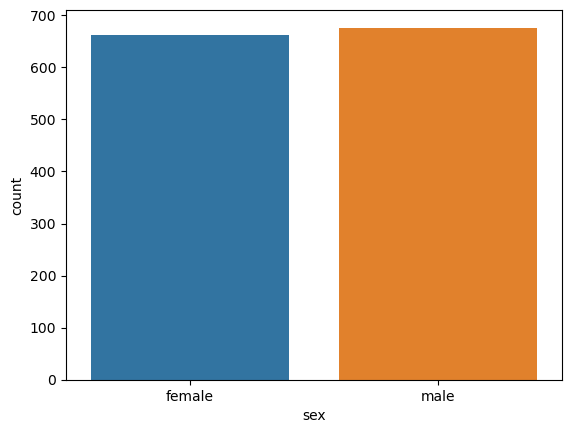

In [20]:
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

As we observe that males are  little bit greater than females



no     1064
yes     274
Name: smoker, dtype: int64


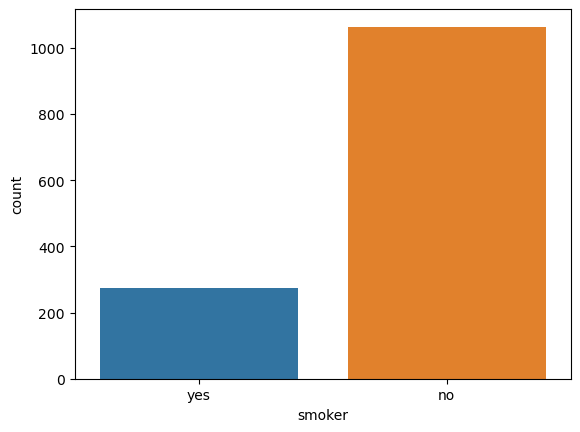

In [22]:
ax=sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

as we can observe most of the people are non-smoker

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


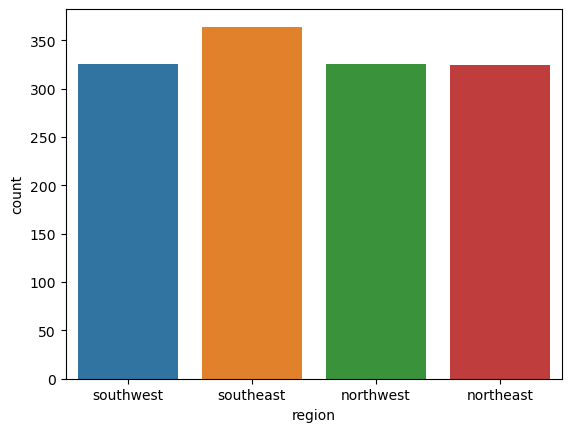

In [23]:
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

As we observe quite higher persons from southeast region



# distribution of numerical features 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


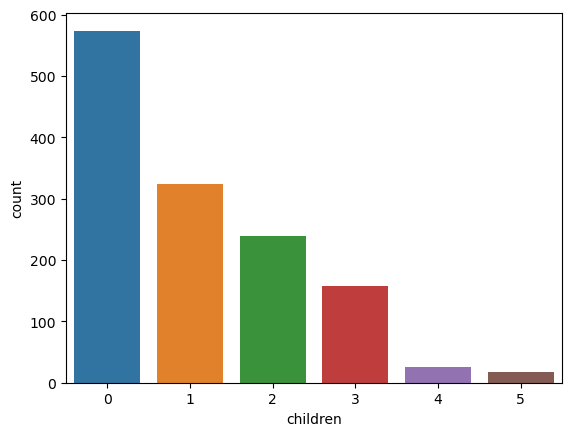

In [21]:
ax=sns.countplot(x='children',data=df)
print(df['children'].value_counts())

<AxesSubplot:xlabel='age', ylabel='Count'>

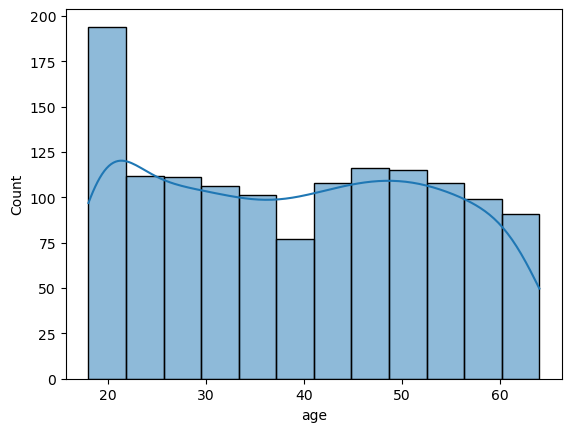

In [27]:
sns.histplot(x=df['age'],data=df,kde=True)


As we observe that most of person age is around 20



<AxesSubplot:xlabel='bmi', ylabel='Count'>

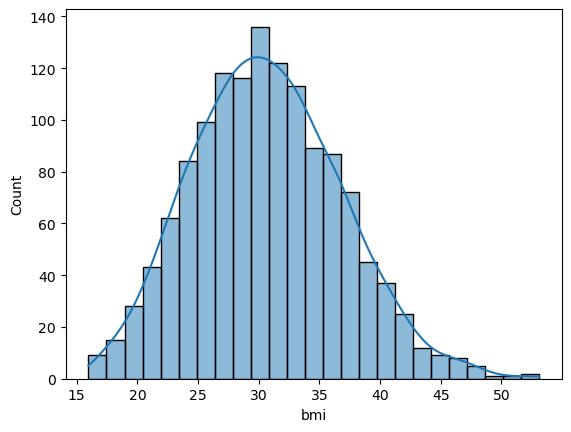

In [28]:
sns.histplot(x=df['bmi'],data=df,kde=True)


As we observe that most of person BMI is around 30



# Encoding of DataFrame


In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()


In [30]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df 

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [31]:
df.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


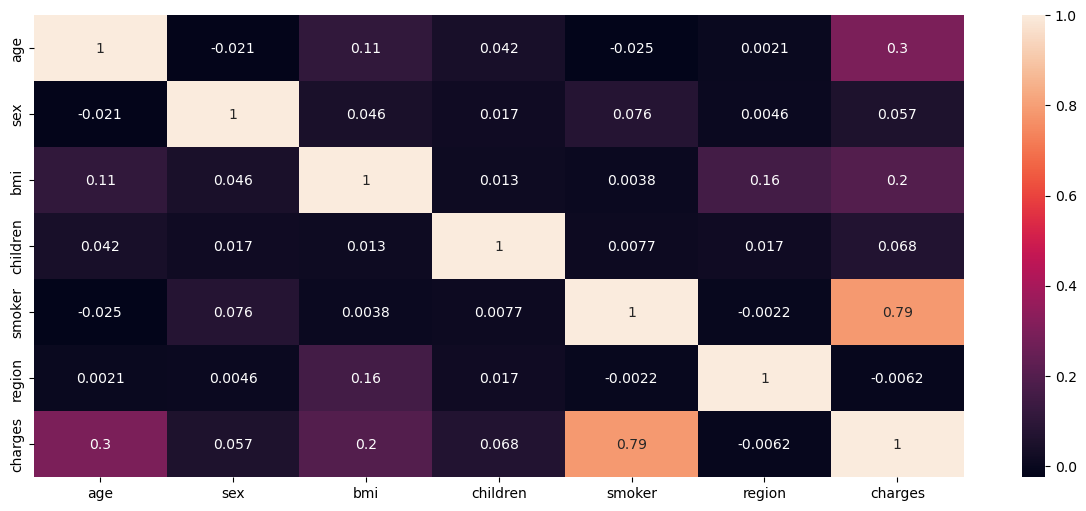

In [32]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Bivariate Analysis

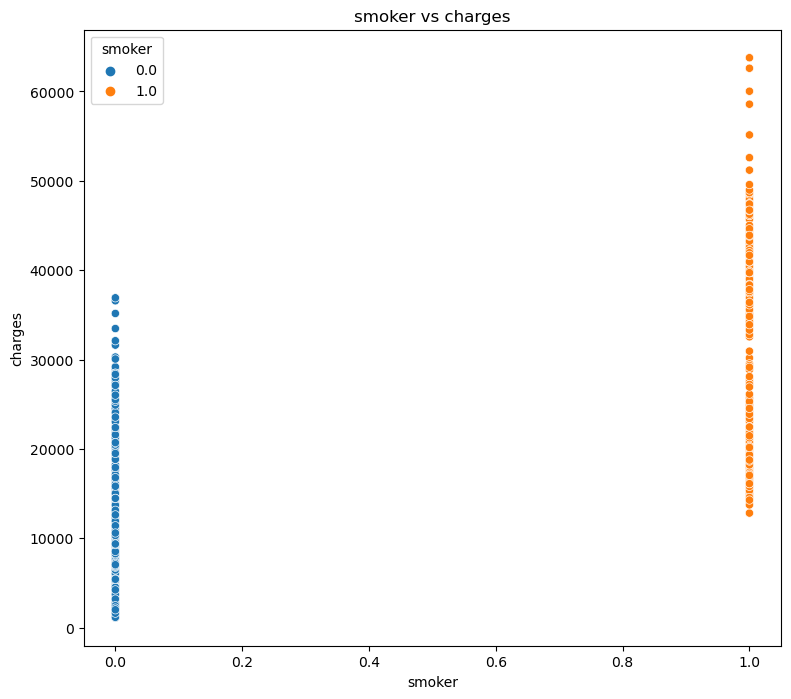

In [34]:
plt.figure(figsize=(9,8))
plt.title('smoker vs charges')
sns.scatterplot(df['smoker'],df['charges'],hue=df['smoker'])
plt.show()

As we obseve if the person is smoker than the charges is high



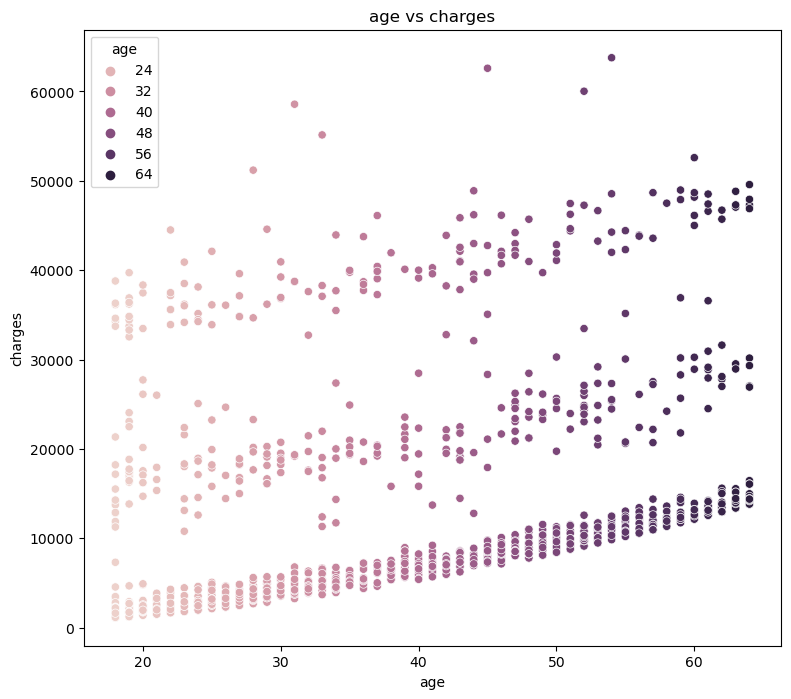

In [36]:
plt.figure(figsize=(9,8))
plt.title('age vs charges')
sns.scatterplot(df['age'],df['charges'],hue=df['age'])
plt.show()

Age is increases then charges will also increases



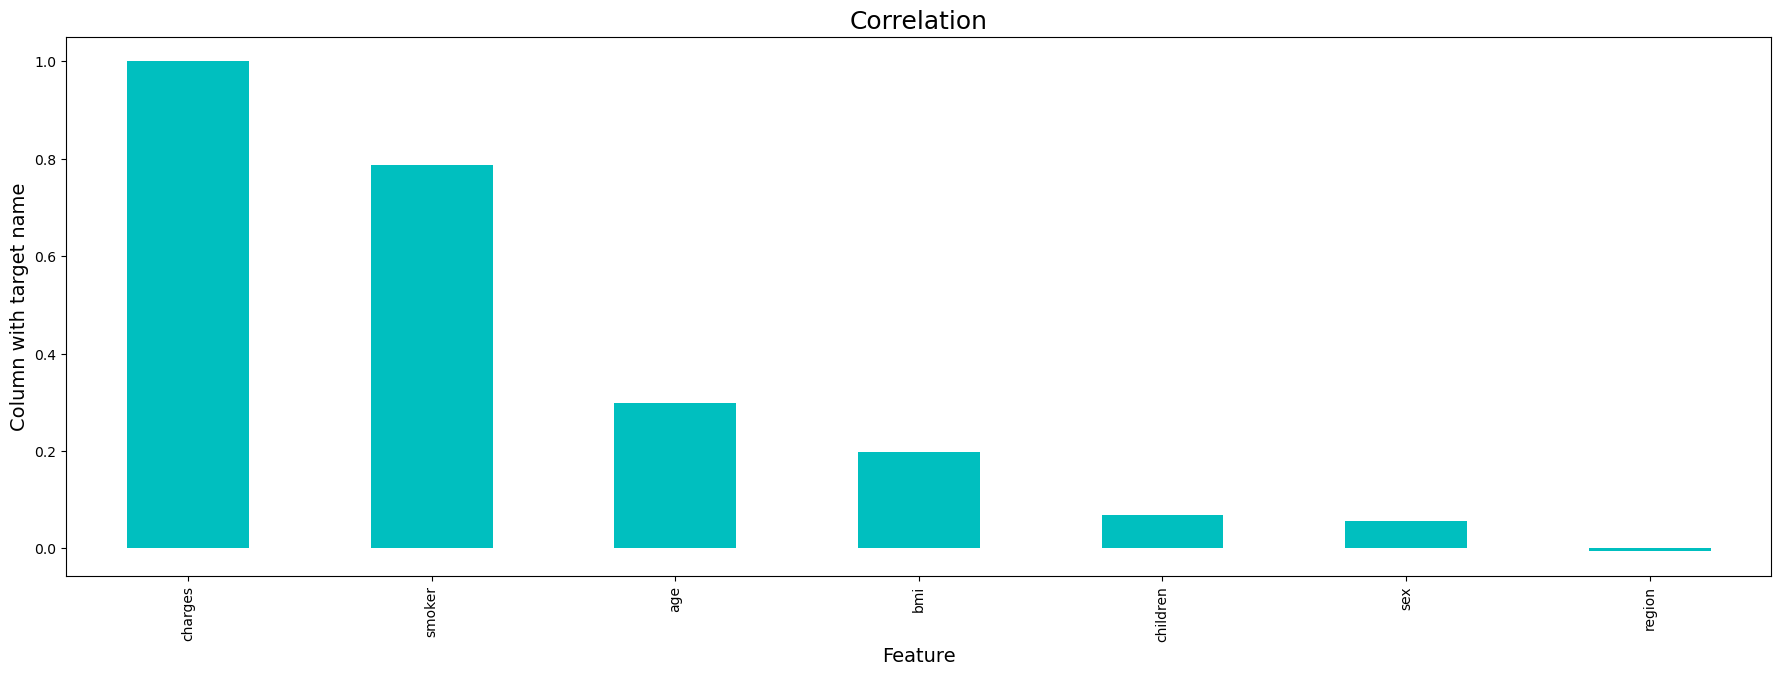

In [37]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target name',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


# Checking outliers

Now check for outliers

age


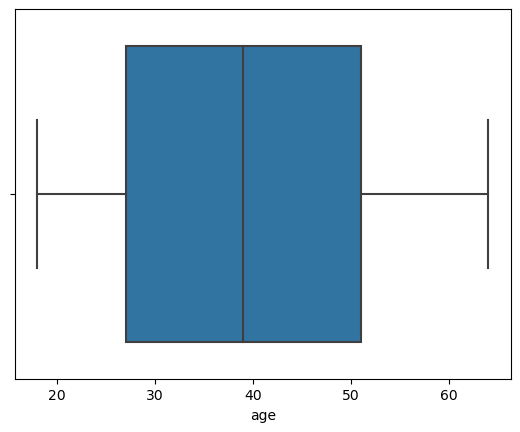

sex


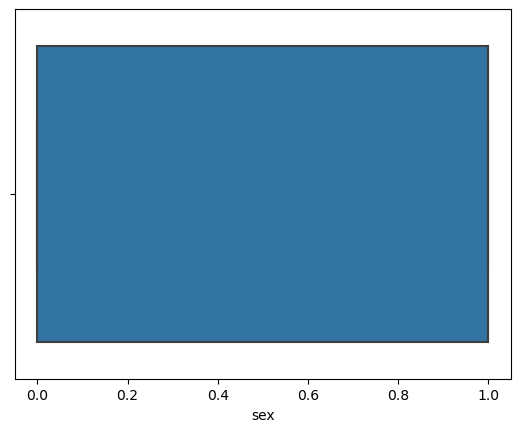

bmi


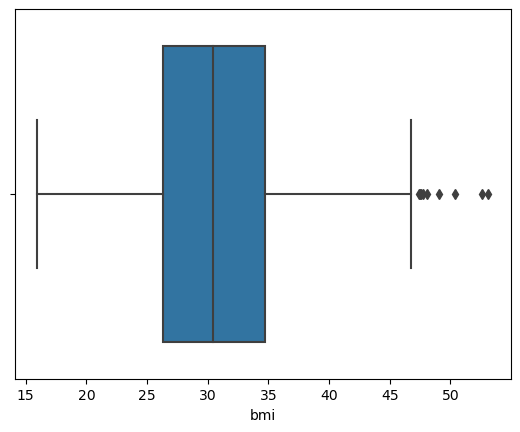

children


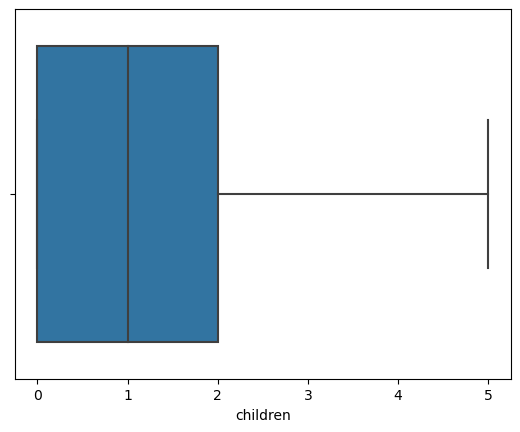

smoker


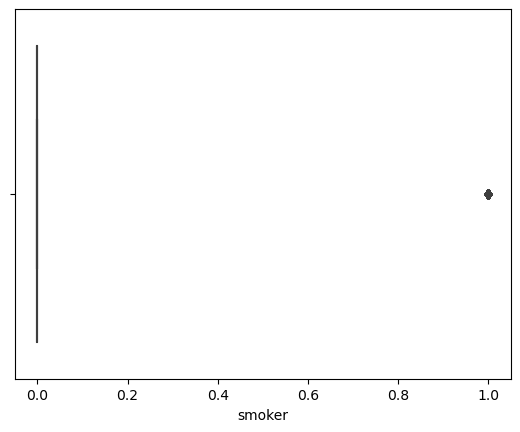

region


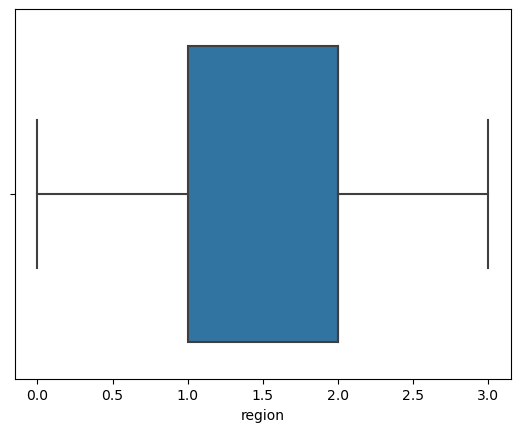

charges


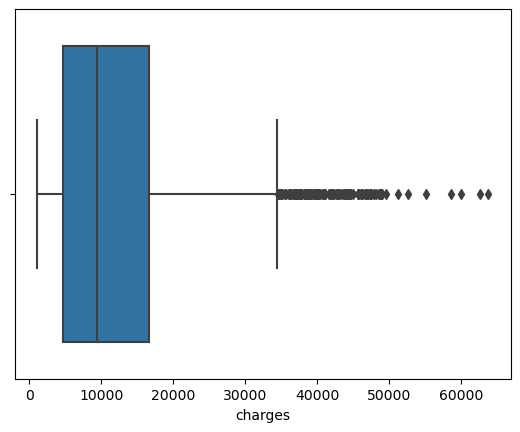

In [38]:
for x in df:
    print(x)
    plt.plot()
    plt.plot(figsize=(7,9))
    sns.boxplot(df[x])
    plt.show()

very less outliers in BMI deal with later



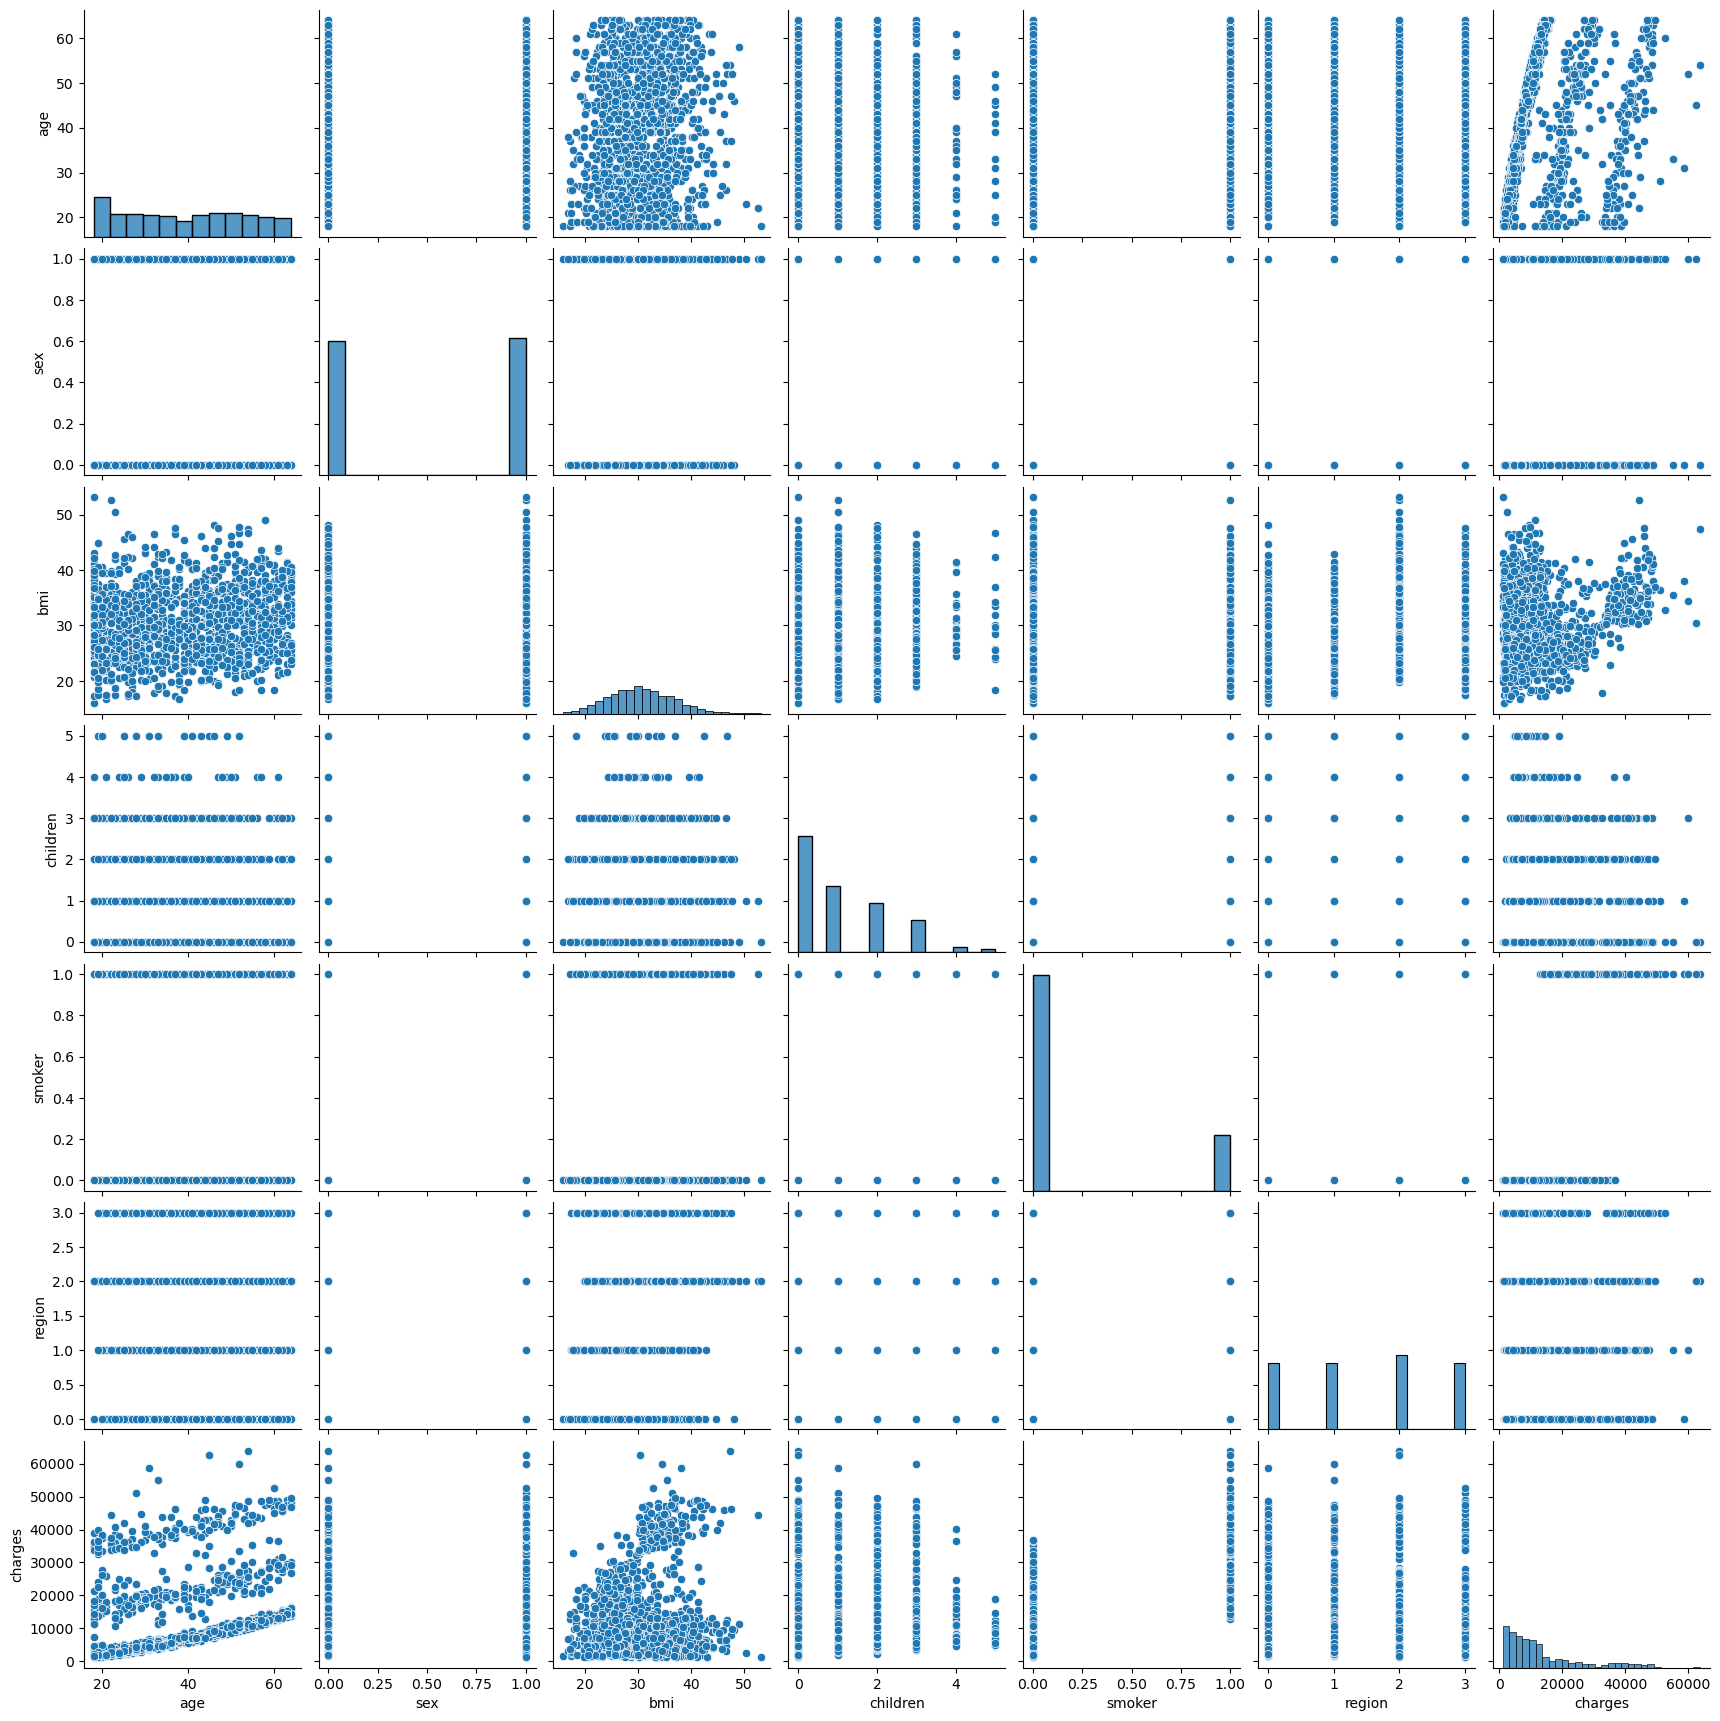

In [39]:
sns.pairplot(df)


not getting any significant pattern



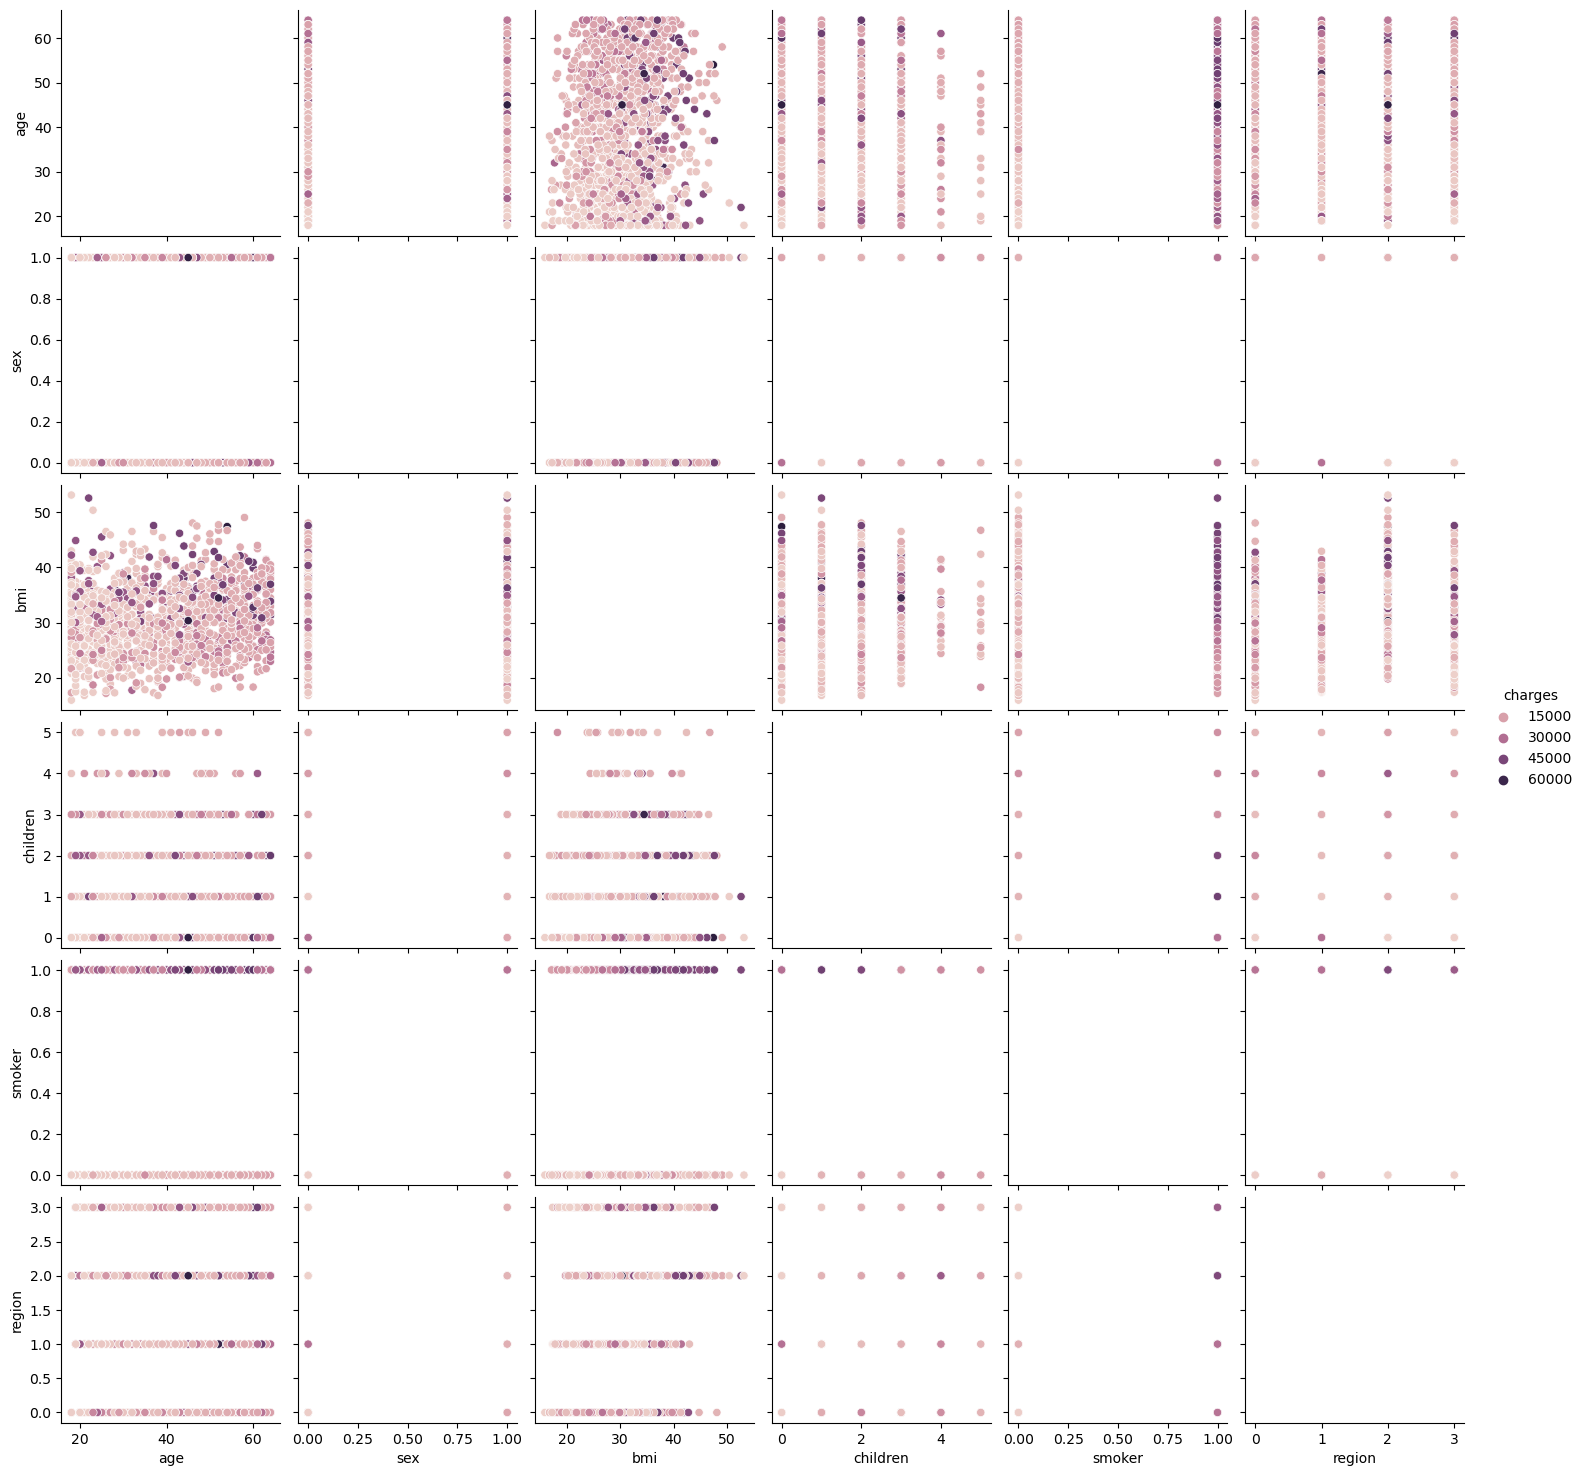

In [40]:
sns.pairplot(df,hue='charges')


# Removing Outliers

Removing the outlier by Zscore method

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
dfz=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-dfz.shape[0])/df.shape[0])


percentage of loss of data by zscore is : 0.021674140508221227


Removing the Outliers by IQR method

In [42]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
dfiq=df[~((df <(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df.shape[0]-dfiq.shape[0])/df.shape[0])

percentage of loss of data by IQR is : 0.21150971599402094


In [43]:
df=dfz.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [44]:
df.shape


(1309, 7)

# Splitting target and feature

In [45]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [46]:
x.shape


(1309, 6)

In [47]:
y.shape


(1309,)

In [76]:
x

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [49]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1309, dtype: float64

In [50]:
#splitting the data into training data & Testing data 

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [55]:
print(x.shape,x_train.shape,x_test.shape)

(1309, 6) (1047, 6) (262, 6)


# Model training 

Linear regression

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [58]:
regressor=LinearRegression()

In [59]:
regressor.fit(x_train,y_train)

LinearRegression()

# Model evaluation

In [61]:
training_data_prediction=regressor.predict(x_train)

In [67]:
r2_train = r2_score(y_train, training_data_prediction)
print('R squared value:', r2_train)


R squared value: 0.761875194636673


In [69]:
test_data_prediction=regressor.predict(x_test)

In [71]:
r2_train = r2_score(y_test, test_data_prediction)
print('R squared value:', r2_train)

R squared value: 0.7163471107004836


Building a Predictive System

In [81]:
input_data = (52,0,28.54,2,1,3 )
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = regressor.predict(input_data_reshaped)
print("The Insurance cost is",prediction[0])

The Insurance cost is 34793.751210953764


Hence now, we can predict the insurance cost using this user defined function but sending in the required details

In [89]:
from sklearn.ensemble import RandomForestRegressor
import joblib
rfs = RandomForestRegressor(n_estimators=100, random_state=42)
rfs.fit(x, y)


RandomForestRegressor(random_state=42)

In [90]:
import joblib
joblib.dump(rfs,'Medical_Cost.obj')

['Medical_Cost.obj']